- # yolo 파일<br>
- yolo_object_detection.py 파일과 동일하게 진행

- Yolo 작업시 필요한 파일은 3가지 (우리가 설정하는게 아님.)
> - yolov3.cfg - 신경망의 구조를 정의한(담고있는) 파일
> - yolov3.weights 신경망 데이터를 담고있는 가중치 파일 / 학습시 생성되는 파일
> - coco.names 작업해야하는(만들어줘야하는) 파일 / 라벨링..?

- 실행파일을 두가지 만들어야함
> VS에서 작업 <br>
> c++ 소스 제공 → 실행 파일 만드는 작업을 함.

1. Anaconda Prompt 실행
2. yolo_object_detection.py 파일이 들어있는 경로 복사 → 프롬프트에서 경로 이동
3. yolo_object_detection.py 실행 .. 

.. 되는데???

In [1]:
import cv2
import numpy as np
import pandas as pd

In [2]:
# 신경망 모델 구조 파일
cfg_file = './opencv_data/yolo/yolov3.cfg'

# 가중치 파일
weights_file = './opencv_data/yolo/yolov3.weights'

# 인식 가능한 사물의 이름(파일)
class_file = './opencv_data/yolo/coco.names'

In [3]:
# yolo 모델을 복원.
# cv2.dnn.readNet(신경망 데이터, 가중치 데이터)
net = cv2.dnn.readNet(weights_file, cfg_file)
net

< cv2.dnn.Net 00000222E46E9CB0>

In [4]:
# 물체 종류를 리스트로 추출.
# 이미지속에 있는 물체들.. ex) 사람, 자동차, 나무 등..

with open(class_file, 'rt') as fp :
    classes = fp.readlines()
    # \n 제거
    classes = [line.strip() for line in classes]
    
classes    

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [5]:
# 각 물체를 의미하는(가리키는) 색상을 랜덤하게 생성.
# 0 ~ 255 사이 
# r, g, b
colors = np.random.uniform(0, 255, size=(len(classes), 3))
colors

array([[1.51472638e+02, 2.33130667e+02, 2.46069724e+02],
       [8.58565489e+01, 1.52502744e+02, 1.40376902e+02],
       [5.98566777e+01, 1.02445644e+02, 2.29433410e+02],
       [1.50020952e+02, 5.01888577e+00, 6.55974341e+01],
       [1.31969066e+02, 1.12881321e+02, 1.19214061e+02],
       [1.88432212e+01, 4.62234099e+01, 1.80510270e+02],
       [1.09137513e+01, 1.14175973e+02, 2.29735892e+02],
       [1.69918417e+02, 1.73210868e+02, 1.96079489e+01],
       [8.01922052e+01, 1.95487656e+02, 1.25910994e+01],
       [1.80708498e+02, 7.12273192e+01, 1.57958920e+02],
       [3.39728144e+01, 1.66493382e+02, 1.07366660e+02],
       [2.07595197e+02, 1.29672025e+02, 1.53786104e+02],
       [5.32912886e+00, 1.19666933e+02, 2.00860585e+02],
       [1.69121247e+02, 1.50891950e+02, 7.90659051e+01],
       [1.30551648e+02, 1.31289478e+02, 2.23762530e+02],
       [4.67927346e+01, 2.30455476e+02, 6.70282928e+01],
       [1.81910285e+02, 1.69606506e+02, 8.63678610e+01],
       [1.09081891e+02, 1.71258

In [6]:
# 사용할 이미지 불러온다.
img =cv2.imread('./opencv_data/image/yolo_01.jpg')

In [7]:
# 이미지 세로, 가로, 채널
height, width, channel = img.shape

In [8]:
# 이미지 크기 조정.
# cv2.resize(원본데이터, (세로,가로))

# 16*16 부터 16 배수로 설정.
# 416, 416 사이즈 권장. 딱히 이유는 없음.

a1 = cv2.resize(img, (416,416))

In [9]:
# 2진 데이터로 변환.

# 0.00392(기준) - 임계값. 이 값보다 크면 1, 작으면 0으로 변환.
# 이 값은 완전 흰색 1, 완전 검정색을 0으로 취급.
# 여기서 설정하는 임계값은 yolo에서 추천하는 값.

blob = cv2.dnn.blobFromImage(a1, 0.00392, (416, 416), (0, 0, 0))

In [10]:
# 예측 전 신경망 구조를 살핌.

# 모델의 정보를 확인.
# 은닉층들의 이름을 가져옴.
layer_names = net.getLayerNames()
layer_names 

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

In [11]:
# 출력층 이름.
output_layers = net.getUnconnectedOutLayersNames()
output_layers

# 결론은 신경망이 3개가 있다는 것.

('yolo_82', 'yolo_94', 'yolo_106')

In [12]:
# 이미지 데이터를 모델에 셋팅.
net.setInput(blob)

In [13]:
# 물체를 검출.
outs = net.forward(output_layers)
outs

# 출력층이 3개이기때문에 ndarray도 3개 

(array([[0.03885192, 0.05044644, 0.35945648, ..., 0.        , 0.        ,
         0.        ],
        [0.04448604, 0.03596887, 0.27568182, ..., 0.        , 0.        ,
         0.        ],
        [0.05033819, 0.03731377, 0.7720317 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.96522146, 0.9480876 , 0.40103167, ..., 0.        , 0.        ,
         0.        ],
        [0.9650735 , 0.96141326, 0.28590482, ..., 0.        , 0.        ,
         0.        ],
        [0.96688354, 0.9601263 , 0.8609129 , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.01812692, 0.02535   , 0.05008673, ..., 0.        , 0.        ,
         0.        ],
        [0.01727686, 0.01927787, 0.39123425, ..., 0.        , 0.        ,
         0.        ],
        [0.02354368, 0.01680703, 0.07943393, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.97256684, 0.9756397 , 0.0461183 , ..., 0.        , 0.        ,
         0.        

### 데이터 구조 확인

In [14]:
outs[0]
outs[0][0]
a1 = outs[0][0]

# 결과값은 비율!!

print(f'물체의 중심점 x : {a1[0]}')
print(f'물체의 중심점 y : {a1[1]}')
print(f'물체의 가로 길이 : {a1[2]}')
print(f'물체의 세로 길이 : {a1[3]}')

# 각 사물별 확률 부분만 가져온다.
# a1 5번째부터 끝까지
a2 = a1[5:]

# 확률이 가장 높은 위치 값을 가져온다.
a3 = np.argmax(a2)

# 확률값을 가져온다.
a4 = a2[a3]
print(f'확률 : {a4}')
print(f'사물이름 : {classes[a3]}')

물체의 중심점 x : 0.03885192051529884
물체의 중심점 y : 0.05044643580913544
물체의 가로 길이 : 0.35945647954940796
물체의 세로 길이 : 0.1388537734746933
확률 : 0.0
사물이름 : person


### 출력층 수 만큼 반복

In [15]:
# 검출된 이미지 그릴꺼임.

# 예측된 결과를 담을 리스트
class_id_list = []

# 예측 정확도
confidence_list = []

# 인지된 사물의 영역
box_list = []

# 4.
# 확률의 임계값
# 이 확률 이상인 것만 결과에 담는다.
# 0.1 ~ 2 정도로 잡아도 충분함.
confidence_limit = 0.5

# 1.
for out in outs :
    # 현재의 출력층이 검출한 물체의 수 만큼 반복.
    for detection in out :
        # 원핫 인코딩되어 있는 확률값만 가져온다.
        score_list = detection[5:]
        # 확률이 가장 높은 물체 값을 가져온다.
        class_id = np.argmax(score_list)
        # 확률을 가져온다.
        confidence = score_list[class_id]
#         print(classes[class_id] , score_list[class_id])

# 5.
        # 확률이 혹률 임계값 이상인 것만 처리.
        if confidence >= confidence_limit:
            
# 2.  6. Tab키 통해서 들여쓰기          
            # 물체의 좌표를 계산.
            # 예측결과에서 앞 4개는 중심점 x 비율, 중심점 y비율, 가로비율, 세로비율
            # 원본 이미지로 환산
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)

            # 가로길이
            w = int(detection[2] * width)
            # 세로길이
            h = int(detection[3] * height)
            # 좌측 상단 x
            x = int(center_x - w / 2)
            # 좌측 상단 y
            y = int(center_y - h / 2)        

            # 담는다.
            box_list.append([x, y, w, h])
            confidence_list.append(float(confidence))
            class_id_list.append(class_id)

# 7.
# IoU : 두 면적이 중첩되는 영역의 넓이를 두 면적의 함친 총 면적으로 나눈 값
# 두 면적이 얼마나 중첩되어 있는지 평가할 수 있는 지표
# 0 ~ 1 사이가 나오며 값이 클수록 중첩된 부분이 많다고 평가.

# NMS : IoU 방식으로 면적을 평가하고 중첩이 많이 되었다고 판단되는 영역을 제거하는 방식.
# IoU 방식으로 평가하여 중첩이 많이 되었다고 판단되는 영역을 모두 아우를수 있는 영역을 만들어 냄.
# cv2.dnn.NMSBoxes( 사물영역, 예측정확도, 확률임계값, 확인하지않고 버릴 영역의 확률값(확률임계값보다 낮게))

# 결과는 인식한 사물의 index 번호
indexes = cv2.dnn.NMSBoxes(box_list, confidence_list, confidence_limit, 0.4)
indexes

array([15, 20,  0, 28,  8, 29, 23, 24, 21])

In [16]:
# 3.
# 결과를 토대로 그린다.
# 검출된 물체의 수 만큼 반복.

for i in range(len(box_list)) :
    
# 8.
    # NMS를 통해 추출한 영역만 표시.
    if i in indexes : 
        
# 9. Tap 눌러서 들여쓰기.
        # 좌표값을 추출.
        x, y, w, h = box_list[i]
        # 이름.
        label = str(classes[class_id_list[i]])
        # 색상.
        color = colors[class_id_list[i]]

        # 네모를 그린다.
        cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
        # 이름을 표시. cv2.FONT_HERSHEY_PLAIN(폰트), 크기, 색상, 두께
        cv2.putText(img, label, (x, y-30), cv2.FONT_HERSHEY_PLAIN, 3, color, 3)

cv2.imshow('Object Detection', img)
cv2.waitKey()
cv2.destroyAllWindows()   

## 물체 검출 평가지표 IoU

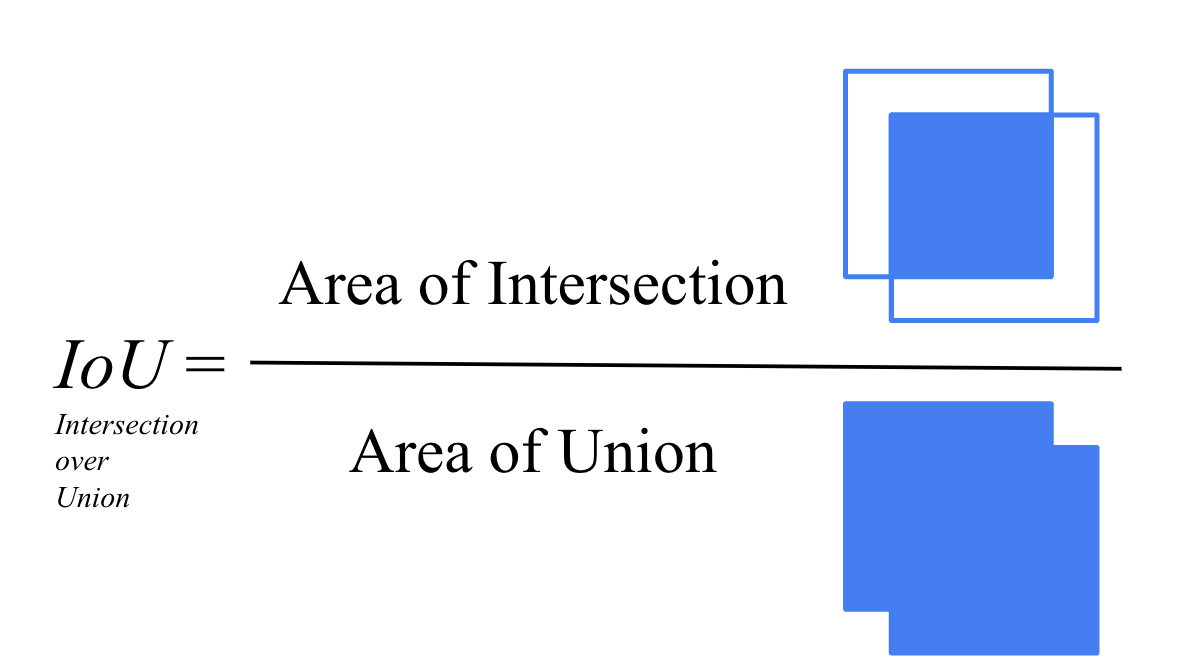

IoU는 Intersection over Union의 약어 <br>
머신러닝의 물체검출 분야에서 2개의 영역이 "얼마나 겹쳐져 있는가"를 표시하는 지표.

- IoU 값이 1이면 거의 겹쳐져 있다.
- IoU 값이 0이면 두 면적이 떨어져 있다.